## Required Libraries

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import matplotlib.image as mpimg
import tensorflow as tf # Deep Learning Framework
import pathlib

## Explore the data

In [2]:
for dirpath, dirnames, filenames in os.walk('../input/intel-image-classification'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '../input/intel-image-classification'.
There are 1 directories and 0 images in '../input/intel-image-classification/seg_train'.
There are 6 directories and 0 images in '../input/intel-image-classification/seg_train/seg_train'.
There are 0 directories and 2512 images in '../input/intel-image-classification/seg_train/seg_train/mountain'.
There are 0 directories and 2382 images in '../input/intel-image-classification/seg_train/seg_train/street'.
There are 0 directories and 2191 images in '../input/intel-image-classification/seg_train/seg_train/buildings'.
There are 0 directories and 2274 images in '../input/intel-image-classification/seg_train/seg_train/sea'.
There are 0 directories and 2271 images in '../input/intel-image-classification/seg_train/seg_train/forest'.
There are 0 directories and 2404 images in '../input/intel-image-classification/seg_train/seg_train/glacier'.
There are 1 directories and 0 images in '../input/intel-image-classification

## Visualizing the data

In [3]:
data_dir = pathlib.Path('../input/intel-image-classification/seg_train/seg_train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [4]:
import random
def view_random_img(target_dir, class_names=class_names):
    target_class = random.choice(class_names)
    randomImg = random.choice(os.listdir(target_dir + '/' + target_class))
    target_path = target_dir + '/' + target_class + '/' + randomImg
    
    img = mpimg.imread(target_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False);

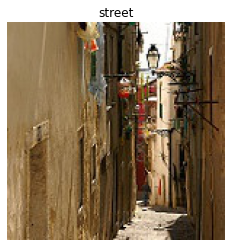

In [5]:
view_random_img(target_dir='../input/intel-image-classification/seg_train/seg_train')

## Prepare the data

In [6]:
test_dir = '../input/intel-image-classification/seg_test/seg_test/'
train_dir = '../input/intel-image-classification/seg_train/seg_train/'

In [7]:
# Load data from directory and turn them into batches
IMG_SIZE = (150, 150)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                        image_size=IMG_SIZE,
                                                                        label_mode="categorical",
                                                                         batch_size=64)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                        image_size=IMG_SIZE,
                                                                        label_mode="categorical",
                                                                         batch_size=64)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [8]:
# Class Names
class_names = train_data.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

## Basic CNN model

In [9]:
# Create the model
model_0 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=IMG_SIZE+(3,)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
220/220 [==============================] - 111s 474ms/step - loss: 1.1543 - accuracy: 0.5453 - val_loss: 0.8156 - val_accuracy: 0.6927
Epoch 2/5
220/220 [==============================] - 31s 137ms/step - loss: 0.7033 - accuracy: 0.7332 - val_loss: 0.5485 - val_accuracy: 0.8030
Epoch 3/5
220/220 [==============================] - 30s 136ms/step - loss: 0.5146 - accuracy: 0.8191 - val_loss: 0.5175 - val_accuracy: 0.8133
Epoch 4/5
220/220 [==============================] - 30s 136ms/step - loss: 0.4027 - accuracy: 0.8566 - val_loss: 0.5315 - val_accuracy: 0.8163
Epoch 5/5
220/220 [==============================] - 30s 136ms/step - loss: 0.3173 - accuracy: 0.8853 - val_loss: 0.5875 - val_accuracy: 0.7993


In [10]:
# Let's check model summary
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

## Ploting loss curve

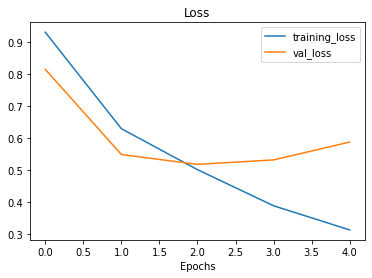

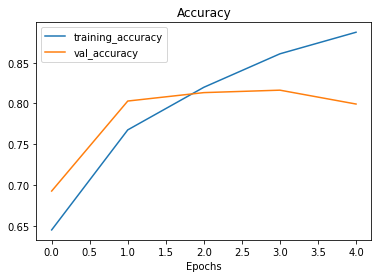

In [11]:
# Ploting loss curve

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
    

plot_loss_curves(history_0)

## Evaluating our model

In [12]:
# Let's evaluate the model
model_0.evaluate(test_data)

47/47 [==============================] - 5s 93ms/step - loss: 0.5875 - accuracy: 0.7993


[0.5875287055969238, 0.7993333339691162]

## Let's now try to train the model on augmented data and see if there is any difference in performance.

In [13]:
# Setting up EarlyStopping Callback
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                          patience=3)
# Setting up model's check point
checkpoint_path = 'model_checkpoint/cp_fine_tune.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor='val_loss',
                                                      save_best_only=True)
                                                    
# Setting up ReduceLROnPlateau Callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=2, verbose=1, min_lr=1e-6)

In [14]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")
mixed_precision.global_policy()

<Policy "mixed_float16">

### Create the Feature Extraction model

In [15]:
# Create the base model
base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False)
base_model.trainable=False
# Create the funtional model
inputs = tf.keras.Input(shape=(IMG_SIZE+(3,)))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(len(class_names))(x)
outputs = tf.keras.layers.Activation('softmax', dtype=tf.float32)(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

258080768/258076736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, None, None, 2560)  64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 15366     
_________________________________________________________________
activation (Activation)      (None, 6)                 0         
Total params: 64,113,053
Trainable params: 15,366
Non-trainable params: 64,097,687
_________________________________________________________________


In [16]:
# Fit the model
history_ENB2 = model_2.fit(train_data,
                             epochs=10,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data),
                             )

Epoch 1/10
220/220 [==============================] - 251s 1s/step - loss: 0.6313 - accuracy: 0.7938 - val_loss: 0.2928 - val_accuracy: 0.8927
Epoch 2/10
220/220 [==============================] - 219s 992ms/step - loss: 0.2713 - accuracy: 0.9021 - val_loss: 0.2664 - val_accuracy: 0.9017
Epoch 3/10
220/220 [==============================] - 218s 989ms/step - loss: 0.2422 - accuracy: 0.9128 - val_loss: 0.2473 - val_accuracy: 0.9127
Epoch 4/10
220/220 [==============================] - 219s 994ms/step - loss: 0.2237 - accuracy: 0.9180 - val_loss: 0.2462 - val_accuracy: 0.9140
Epoch 5/10
220/220 [==============================] - 218s 988ms/step - loss: 0.2092 - accuracy: 0.9224 - val_loss: 0.2409 - val_accuracy: 0.9130
Epoch 6/10
220/220 [==============================] - 218s 987ms/step - loss: 0.1992 - accuracy: 0.9284 - val_loss: 0.2373 - val_accuracy: 0.9147
Epoch 7/10
220/220 [==============================] - 217s 987ms/step - loss: 0.1922 - accuracy: 0.9294 - val_loss: 0.2368 - va

In [17]:
model_2.optimizer.learning_rate = 1e-4

In [18]:
# Fit the model
history_ENB2 = model_2.fit(train_data,
                             epochs=10,
                             steps_per_epoch=len(train_data),
                             validation_data=test_data,
                             validation_steps=len(test_data),
                             )

Epoch 1/10
220/220 [==============================] - 218s 987ms/step - loss: 0.1676 - accuracy: 0.9409 - val_loss: 0.2296 - val_accuracy: 0.9150
Epoch 2/10
220/220 [==============================] - 218s 989ms/step - loss: 0.1663 - accuracy: 0.9410 - val_loss: 0.2290 - val_accuracy: 0.9137
Epoch 3/10
220/220 [==============================] - 218s 991ms/step - loss: 0.1652 - accuracy: 0.9416 - val_loss: 0.2289 - val_accuracy: 0.9133
Epoch 4/10
220/220 [==============================] - 218s 991ms/step - loss: 0.1649 - accuracy: 0.9418 - val_loss: 0.2287 - val_accuracy: 0.9140
Epoch 5/10
220/220 [==============================] - 218s 990ms/step - loss: 0.1645 - accuracy: 0.9425 - val_loss: 0.2297 - val_accuracy: 0.9133
Epoch 6/10
220/220 [==============================] - 220s 996ms/step - loss: 0.1642 - accuracy: 0.9427 - val_loss: 0.2296 - val_accuracy: 0.9140
Epoch 7/10
220/220 [==============================] - 219s 993ms/step - loss: 0.1633 - accuracy: 0.9424 - val_loss: 0.2288 -

### Plot the loss curve

In [19]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

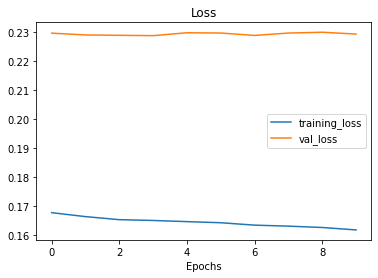

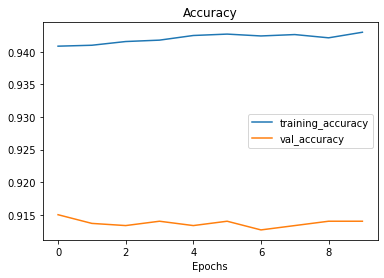

In [20]:
plot_loss_curves(history_ENB2)

### Evaluate and save the Feature Extraction model

In [21]:
result_feature_extraction = model_2.evaluate(test_data)

47/47 [==============================] - 38s 804ms/step - loss: 0.2293 - accuracy: 0.9140


In [22]:
Y_pred = model_2.predict_generator(test_data, steps=len(test_data))
y_pred = np.argmax(Y_pred, axis=1)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [23]:
act = np.array([])
y_pred = []
for ele in test_data:
    act = np.append(act,np.argmax(ele[1], axis=1).flatten())
    y_pred = np.append(y_pred,np.argmax(model_2.predict(ele[0]), axis=1).flatten())

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
confusion_mtx = confusion_matrix(act, y_pred)
class_report = classification_report(act, y_pred)

In [25]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       437
         1.0       0.99      0.98      0.98       474
         2.0       0.87      0.80      0.84       553
         3.0       0.85      0.89      0.87       525
         4.0       0.93      0.96      0.94       510
         5.0       0.94      0.93      0.93       501

    accuracy                           0.91      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.91      0.91      0.91      3000



<AxesSubplot:>

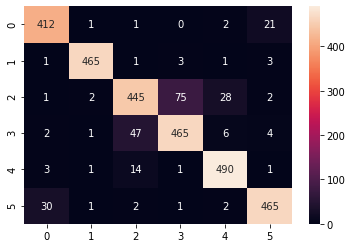

In [26]:
import seaborn as sns
sns.heatmap(confusion_mtx,annot=True,fmt='g')

In [27]:
 model_2.save('FeatureExtraction.h5')

In [28]:
!ls

FeatureExtraction.h5  __notebook_source__.ipynb


### Load the model for Fine tuning

In [29]:
loaded_model = tf.keras.models.load_model('FeatureExtraction.h5')

In [30]:
# Making Layer of our base_model trainable for fine-tuning
loaded_model.layers[1].trainable = True

In [31]:
print(len(loaded_model.layers[1].trainable_variables))

709


### Compile and Fit the model for fine tuning

In [32]:
# Compile the loaded model for fine tuning
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     metrics=["accuracy"])

In [ ]:
# Fit the fine tuned model
history_fine_tune_ENB2 = loaded_model.fit(train_data,
                                         epochs=20,
                                         steps_per_epoch=len(train_data),
                                         validation_data=test_data,
                                         validation_steps=len(test_data),
                                         callbacks=[model_checkpoint, earlystopping_callback,
                                                   reduce_lr])

Epoch 1/20
220/220 [==============================] - 417s 2s/step - loss: 0.2106 - accuracy: 0.9250 - val_loss: 0.2043 - val_accuracy: 0.9253
Epoch 2/20
220/220 [==============================] - 361s 2s/step - loss: 0.0656 - accuracy: 0.9746 - val_loss: 0.2427 - val_accuracy: 0.9200
Epoch 3/20
220/220 [==============================] - 361s 2s/step - loss: 0.0350 - accuracy: 0.9881 - val_loss: 0.2691 - val_accuracy: 0.9327

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 4/20
136/220 [=================>............] - ETA: 2:03 - loss: 0.0177 - accuracy: 0.9937

In [ ]:
# Evalute our model
loaded_model.evaluate(test_data)

### Let's view some predicted results.

In [ ]:
def load_and_prep_image(filename, img_shape=150, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
import os
pred_img = os.listdir("../input/intel-image-classification/seg_pred/seg_pred/")
import random
custom_images = []
for i in range(10):
  custom_images.append("../input/intel-image-classification/seg_pred/seg_pred/"+random.choice(pred_img))

custom_images

In [ ]:
# Make predictions on custom images
plt.figure(figsize=(15,13),tight_layout=True)
for i, img in enumerate(custom_images):
    img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
    pred_prob = loaded_model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 150, 150, 3]
    pred_class = class_names[pred_prob.argmax()] # find the predicted class label
    
  
    # Plot the image with appropriate annotations
    plt.subplot(2, 5, i+1)
    plt.imshow(img/255.) # imshow() requires float inputs to be normalized
    plt.title(f"pred: {pred_class} | prob: {pred_prob.max():.2f}")
    plt.axis(False)

In [ ]:
def pred_plot(file, model, class_names=class_names, image_size=(150, 150)):
    img = tf.io.read_file(file)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.resize(img, size=image_size)
    
    pred_probs = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_probs.argmax()]
    
    plt.imshow(img/225.)
    plt.title(f'Pred: {pred_class}')
    plt.axis(False);

In [ ]:
url ='../input/mountain1/mountaain.jpg'
pred_plot(url, model=model_2, class_names=class_names)

In [ ]:
# Save fine tune model
loaded_model.save('fine-tune-ENB2.h5')

In [ ]:
from fastai.vision.all import *


In [ ]:
test_path =  Path("../input/intel-image-classification/seg_test/seg_test")
train_path = Path("../input/intel-image-classification/seg_train/seg_train")

In [ ]:
train_dls = ImageDataLoaders.from_folder(train_path, train='.', valid_pct=0.1, item_tfms=Resize(224))


In [ ]:
test_dls = ImageDataLoaders.from_folder(test_path,valid_pct = 0.01 ,item_tfms=Resize(224))


In [ ]:
learn.fit_one_cycle(5)

In [ ]:
num_epochs = 5
learn.fine_tune(num_epochs)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=2,ncols=2)

In [ ]:
interp.plot_confusion_matrix()